In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel("../resources/train.xlsx")

In [3]:
df

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,blue-collar,casado,secundaria/superiores,no,580,si,no,NaN,192,2021-05-16 00:00:00,1,-1,0,NaN,no
1,2,47,services,soltero,secundaria/superiores,no,3644,no,no,NaN,83,2021-06-09 00:00:00,2,-1,0,NaN,no
2,3,25,student,soltero,universitarios,no,538,si,no,movil,226,20-apr-2021,1,-1,0,NaN,no
3,4,42,management,casado,universitarios,no,1773,no,no,movil,311,9-apr-2021,1,336,1,sin_exito,no
4,5,56,management,casado,universitarios,no,217,no,si,movil,121,2021-07-21 00:00:00,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44251,44252,38,management,casado,secundaria/superiores,no,-323,si,no,NaN,250,2021-06-09 00:00:00,1,-1,0,NaN,no
44252,44253,49,technician,casado,secundaria/superiores,no,1982,si,si,movil,73,22-aug-2021,15,-1,0,NaN,no
44253,44254,51,blue-collar,casado,secundaria/superiores,no,794,si,no,fijo,747,2021-07-24 00:00:00,1,-1,0,NaN,no
44254,44255,29,blue-collar,soltero,universitarios,no,98,no,no,movil,170,10-aug-2021,2,-1,0,NaN,no


In [58]:
df.drop("ID", axis=1, inplace=True)

In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,44256.0,22128.500000,12775.751093,1.0,11064.75,22128.5,33192.25,44256.0
edad,44256.0,40.934856,10.626296,18.0,33.00,39.0,48.00,95.0
saldo,44256.0,1361.455509,3053.362628,-8019.0,72.00,447.0,1424.25,102127.0
duracion,44256.0,258.320906,257.668451,0.0,103.00,180.0,319.00,4918.0
campaign,44256.0,2.761004,3.093201,1.0,1.00,2.0,3.00,63.0
tiempo_transcurrido,44256.0,40.259739,100.127699,-1.0,-1.00,-1.0,-1.00,871.0
contactos_anteriores,44256.0,0.581593,2.314184,0.0,0.00,0.0,0.00,275.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44256 entries, 0 to 44255
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID                             44256 non-null  int64 
 1   edad                           44256 non-null  int64 
 2   trabajo                        44256 non-null  object
 3   estado_civil                   44256 non-null  object
 4   educacion                      42446 non-null  object
 5   deuda                          44256 non-null  object
 6   saldo                          44256 non-null  int64 
 7   vivienda                       44256 non-null  object
 8   prestamo                       44256 non-null  object
 9   tipo_contacto                  31526 non-null  object
 10  duracion                       44256 non-null  int64 
 11  fecha_contacto                 44256 non-null  object
 12  campaign                       44256 non-null  int64 
 13  t

In [6]:
df["trabajo"].value_counts()

blue-collar      9519
management       9263
technician       7436
admin.           5076
services         4056
retired          2217
self-employed    1548
entrepreneur     1450
unemployed       1274
housemaid        1215
student           922
unknown           280
Name: trabajo, dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

ID                                0.000000
edad                              0.000000
trabajo                           0.000000
estado_civil                      0.000000
educacion                         4.089841
deuda                             0.000000
saldo                             0.000000
vivienda                          0.000000
prestamo                          0.000000
tipo_contacto                    28.764461
duracion                          0.000000
fecha_contacto                    0.000000
campaign                          0.000000
tiempo_transcurrido               0.000000
contactos_anteriores              0.000000
resultado_campanas_anteriores    81.713214
target                            0.000000
dtype: float64

In [8]:
df["resultado_campanas_anteriores"].fillna("nuevo_cliente", inplace=True)

In [9]:
df_test = df[["edad", "trabajo", "tipo_contacto", "duracion", "tiempo_transcurrido"]]

In [10]:
df_test[~df_test["tipo_contacto"].notna()][:60]

,edad,trabajo,tipo_contacto,duracion,tiempo_transcurrido
0,40,blue-collar,NaN,192,-1
1,47,services,NaN,83,-1
9,38,technician,NaN,587,-1
12,30,blue-collar,NaN,395,-1
18,46,blue-collar,NaN,172,-1
23,44,blue-collar,NaN,111,-1
25,33,services,NaN,109,-1
28,60,technician,NaN,64,-1
29,51,blue-collar,NaN,76,-1
36,46,blue-collar,NaN,145,-1


In [11]:
df["educacion"].value_counts()

secundaria/superiores    22713
universitarios           13025
priamaria                 6708
Name: educacion, dtype: int64

In [12]:
df["target"].replace("no", 0, inplace=True)
df["target"].replace("si", 1, inplace=True)

In [13]:
df["target"].value_counts()

0    39069
1     5187
Name: target, dtype: int64

In [14]:
5187*100/(39069+5187)

11.720444685466378

In [15]:
df["tipo_contacto"].fillna("desconocido", inplace=True)

In [16]:
df_1 = df[df["target"]==1]

In [17]:
df_0 = df[df["target"]==0]

In [18]:
df_1["tipo_contacto"].value_counts()

movil          4285
desconocido     522
fijo            380
Name: tipo_contacto, dtype: int64

In [19]:
522*100/(380+4285+522)

10.063620589936379

In [20]:
df_0["tipo_contacto"].value_counts()

movil          24400
desconocido    12208
fijo            2461
Name: tipo_contacto, dtype: int64

In [21]:
12208*100/(2461+24400+12208)

31.2472804525327

In [22]:
522*100/(522+12208)

4.100549882168107

<AxesSubplot:xlabel='trabajo', ylabel='Count'>

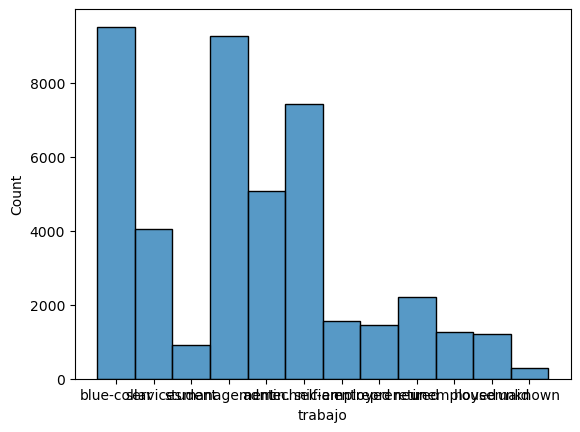

In [23]:
sns.histplot(x = df["trabajo"])

In [24]:
df[(df["trabajo"]=="services")  & (df["target"]==0)].shape

(3699, 17)

In [25]:
df[(df["trabajo"]=="services")  & (df["target"]==1)].shape

(357, 17)

In [26]:
196*100/(196+1078)

15.384615384615385

In [27]:
1272*100/(1272+7991)

13.73205225089064

In [28]:
357*100/(357+3699)

8.801775147928995

In [29]:
# Vamos a dejarlo así, y vamos a convertir esta columna a numerica con LabelEncoder

from sklearn.preprocessing import LabelEncoder

# Inicializamos un objeto LabelEncoder()
trabajo_labelEncoding = LabelEncoder()

# Lo "entrenamos" con los datos de la columna
trabajo_labelEncoding.fit(df["trabajo"].values)

# Transformamos la columna
trabajo = trabajo_labelEncoding.transform(df["trabajo"].values)

trabajo

array([1, 7, 8, ..., 1, 1, 9])

In [30]:
df["trabajo"] = trabajo

In [31]:
df

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,1,casado,secundaria/superiores,no,580,si,no,desconocido,192,2021-05-16 00:00:00,1,-1,0,nuevo_cliente,0
1,2,47,7,soltero,secundaria/superiores,no,3644,no,no,desconocido,83,2021-06-09 00:00:00,2,-1,0,nuevo_cliente,0
2,3,25,8,soltero,universitarios,no,538,si,no,movil,226,20-apr-2021,1,-1,0,nuevo_cliente,0
3,4,42,4,casado,universitarios,no,1773,no,no,movil,311,9-apr-2021,1,336,1,sin_exito,0
4,5,56,4,casado,universitarios,no,217,no,si,movil,121,2021-07-21 00:00:00,2,-1,0,nuevo_cliente,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44251,44252,38,4,casado,secundaria/superiores,no,-323,si,no,desconocido,250,2021-06-09 00:00:00,1,-1,0,nuevo_cliente,0
44252,44253,49,9,casado,secundaria/superiores,no,1982,si,si,movil,73,22-aug-2021,15,-1,0,nuevo_cliente,0
44253,44254,51,1,casado,secundaria/superiores,no,794,si,no,fijo,747,2021-07-24 00:00:00,1,-1,0,nuevo_cliente,0
44254,44255,29,1,soltero,universitarios,no,98,no,no,movil,170,10-aug-2021,2,-1,0,nuevo_cliente,0


In [32]:
df_estado_civil = pd.get_dummies(df["estado_civil"])

In [33]:
df_contacto = pd.get_dummies(df["tipo_contacto"])

In [34]:
df_campanas_anteriores = pd.get_dummies(df["resultado_campanas_anteriores"])

In [35]:
df["deuda"].replace("no", 0, inplace=True)
df["deuda"].replace("si", 1, inplace=True)

In [36]:
df["vivienda"].replace("no", 0, inplace=True)
df["vivienda"].replace("si", 1, inplace=True)

In [37]:
df["prestamo"].replace("no", 0, inplace=True)
df["prestamo"].replace("si", 1, inplace=True)

In [38]:
df.drop("fecha_contacto",axis=1, inplace=True)

In [39]:
df = pd.concat([df, df_contacto], axis=1)
df = pd.concat([df, df_contacto], axis=1)
df = pd.concat([df, df_campanas_anteriores], axis=1)

In [40]:
df.drop(columns=["estado_civil", "tipo_contacto", "resultado_campanas_anteriores"], inplace=True)

In [41]:
df.shape

(44256, 23)

In [42]:
df

,ID,edad,trabajo,educacion,deuda,saldo,vivienda,prestamo,duracion,campaign,...,desconocido,fijo,movil,desconocido,fijo,movil,exito,nuevo_cliente,otro,sin_exito
0,1,40,1,secundaria/superiores,0,580,1,0,192,1,...,1,0,0,1,0,0,0,1,0,0
1,2,47,7,secundaria/superiores,0,3644,0,0,83,2,...,1,0,0,1,0,0,0,1,0,0
2,3,25,8,universitarios,0,538,1,0,226,1,...,0,0,1,0,0,1,0,1,0,0
3,4,42,4,universitarios,0,1773,0,0,311,1,...,0,0,1,0,0,1,0,0,0,1
4,5,56,4,universitarios,0,217,0,1,121,2,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44251,44252,38,4,secundaria/superiores,0,-323,1,0,250,1,...,1,0,0,1,0,0,0,1,0,0
44252,44253,49,9,secundaria/superiores,0,1982,1,1,73,15,...,0,0,1,0,0,1,0,1,0,0
44253,44254,51,1,secundaria/superiores,0,794,1,0,747,1,...,0,1,0,0,1,0,0,1,0,0
44254,44255,29,1,universitarios,0,98,0,0,170,2,...,0,0,1,0,0,1,0,1,0,0


In [43]:
df["educacion"].value_counts()

secundaria/superiores    22713
universitarios           13025
priamaria                 6708
Name: educacion, dtype: int64

In [48]:
df["educacion"] = df["educacion"].replace("secundaria/superiores", 0)
df["educacion"] = df["educacion"].replace("universitarios", 1)
df["educacion"] = df["educacion"].replace("priamaria", 2)

In [49]:
df

,ID,edad,trabajo,educacion,deuda,saldo,vivienda,prestamo,duracion,campaign,...,desconocido,fijo,movil,desconocido,fijo,movil,exito,nuevo_cliente,otro,sin_exito
0,1,40,1,0.0,0,580,1,0,192,1,...,1,0,0,1,0,0,0,1,0,0
1,2,47,7,0.0,0,3644,0,0,83,2,...,1,0,0,1,0,0,0,1,0,0
2,3,25,8,1.0,0,538,1,0,226,1,...,0,0,1,0,0,1,0,1,0,0
3,4,42,4,1.0,0,1773,0,0,311,1,...,0,0,1,0,0,1,0,0,0,1
4,5,56,4,1.0,0,217,0,1,121,2,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44251,44252,38,4,0.0,0,-323,1,0,250,1,...,1,0,0,1,0,0,0,1,0,0
44252,44253,49,9,0.0,0,1982,1,1,73,15,...,0,0,1,0,0,1,0,1,0,0
44253,44254,51,1,0.0,0,794,1,0,747,1,...,0,1,0,0,1,0,0,1,0,0
44254,44255,29,1,1.0,0,98,0,0,170,2,...,0,0,1,0,0,1,0,1,0,0


In [50]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 3)

df_num_imp = imputer.fit_transform(df)

df_num_imp

array([[1.0000e+00, 4.0000e+01, 1.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 4.7000e+01, 7.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+00, 2.5000e+01, 8.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [4.4254e+04, 5.1000e+01, 1.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.4255e+04, 2.9000e+01, 1.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.4256e+04, 3.2000e+01, 9.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [51]:
df["educacion"] = df["educacion"].replace(0, "secundaria/superiores")
df["educacion"] = df["educacion"].replace(1, "universitarios")
df["educacion"] = df["educacion"].replace(2, "priamaria")

In [52]:

df_imp = pd.DataFrame(df, columns = df.columns)


In [55]:
df_imp

,ID,edad,trabajo,educacion,deuda,saldo,vivienda,prestamo,duracion,campaign,...,desconocido,fijo,movil,desconocido,fijo,movil,exito,nuevo_cliente,otro,sin_exito
0,1,40,1,secundaria/superiores,0,580,1,0,192,1,...,1,0,0,1,0,0,0,1,0,0
1,2,47,7,secundaria/superiores,0,3644,0,0,83,2,...,1,0,0,1,0,0,0,1,0,0
2,3,25,8,universitarios,0,538,1,0,226,1,...,0,0,1,0,0,1,0,1,0,0
3,4,42,4,universitarios,0,1773,0,0,311,1,...,0,0,1,0,0,1,0,0,0,1
4,5,56,4,universitarios,0,217,0,1,121,2,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44251,44252,38,4,secundaria/superiores,0,-323,1,0,250,1,...,1,0,0,1,0,0,0,1,0,0
44252,44253,49,9,secundaria/superiores,0,1982,1,1,73,15,...,0,0,1,0,0,1,0,1,0,0
44253,44254,51,1,secundaria/superiores,0,794,1,0,747,1,...,0,1,0,0,1,0,0,1,0,0
44254,44255,29,1,universitarios,0,98,0,0,170,2,...,0,0,1,0,0,1,0,1,0,0


In [56]:
df_educacion = pd.get_dummies(df_imp["educacion"])
df = pd.concat([df_imp, df_educacion], axis=1)
df_imp.drop("educacion", axis = 1,inplace=True)

In [59]:
df_imp

,edad,trabajo,deuda,saldo,vivienda,prestamo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,...,desconocido,fijo,movil,desconocido,fijo,movil,exito,nuevo_cliente,otro,sin_exito
0,40,1,0,580,1,0,192,1,-1,0,...,1,0,0,1,0,0,0,1,0,0
1,47,7,0,3644,0,0,83,2,-1,0,...,1,0,0,1,0,0,0,1,0,0
2,25,8,0,538,1,0,226,1,-1,0,...,0,0,1,0,0,1,0,1,0,0
3,42,4,0,1773,0,0,311,1,336,1,...,0,0,1,0,0,1,0,0,0,1
4,56,4,0,217,0,1,121,2,-1,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44251,38,4,0,-323,1,0,250,1,-1,0,...,1,0,0,1,0,0,0,1,0,0
44252,49,9,0,1982,1,1,73,15,-1,0,...,0,0,1,0,0,1,0,1,0,0
44253,51,1,0,794,1,0,747,1,-1,0,...,0,1,0,0,1,0,0,1,0,0
44254,29,1,0,98,0,0,170,2,-1,0,...,0,0,1,0,0,1,0,1,0,0


### 

In [ ]:
sns.histplot(x = df["estado_civil"])

In [ ]:
sns.kdeplot(x = df["edad"])

In [ ]:
sns.histplot(x = df["educacion"])

In [ ]:
sns.histplot(x = df["deuda"])

In [ ]:
sns.kdeplot(x = df["saldo"])

In [ ]:
sns.histplot(x = df["vivienda"])

In [ ]:
sns.histplot(x = df["prestamo"])

In [ ]:
sns.kdeplot(x = df["campaign"])

In [ ]:
sns.kdeplot(x = df["tiempo_transcurrido"])

In [ ]:
sns.scatterplot(x = df["tiempo_transcurrido"].value_counts().index, y = df["tiempo_transcurrido"].value_counts().values)

In [ ]:
sns.kdeplot(df["contactos_anteriores"])